In [ ]:
#Qiming Sun
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [ ]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [32]:
print(x)
print(tx)

[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [33]:


def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # y = y.reshape(len(y),1)
    # if w.ndim == 1:
    #     w = w.reshape(len(w),1)
    loss = np.mean((y - tx.dot(w))**2)/2
    return loss
    # ***************************************************
    raise NotImplementedError

In [34]:
# test
w = np.array([1,2]).T
compute_loss(y,tx,w)
# print(tx.dot(w))
# print(tx@w)
# print(tx*w)
# print(np.multiply(tx,w))
y.shape

(10000,)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [35]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    losses = np.zeros((len(grid_w0),len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            w = np.array((grid_w0[i],grid_w1[j]))
            losses[i,j] = compute_loss(y,tx,w)
    # W = np.array(np.meshgrid(grid_w0, grid_w1)).transpose(1,0,2)
    # y = y.reshape(len(y),1)
    # # losses = np.mean((y - tx.dot(W).reshape(len(tx),-1))**2, axis = 0).reshape(len(grid_w0),-1)
    # losses = compute_loss(y,tx,W).reshape(len(grid_w0),-1)
    return losses
    # ***************************************************
    raise NotImplementedError
  

In [36]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)
# grid_w0[1]
losses = np.zeros((len(grid_w0),len(grid_w1)))
np.array((grid_w0[0],grid_w1[0])).shape
# grid_w1

(2,)

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.013 seconds


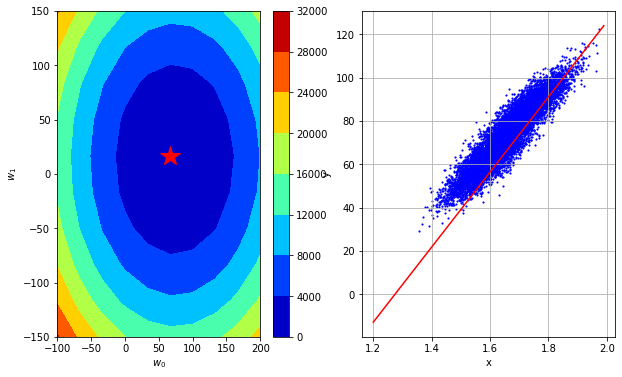

In [37]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
# fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [38]:
from matplotlib.pyplot import grid


def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # y = y.reshape(len(y),-1)
    grid = -np.mean((y - tx.dot(w)).reshape(len(y),-1)*tx,axis=0)

    return grid
    # ***************************************************
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [39]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        loss = compute_loss(y,tx,w)
        grid = compute_gradient(y,tx,w)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma*grid
        # ***************************************************
        # raise NotImplementedError
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [ ]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([50, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=292.7434883040181, w0=52.32939220021051, w1=10.3479712434989
GD iter. 1/49: loss=240.0455442213324, w0=54.425845180399975, w1=10.661145362647916
GD iter. 2/49: loss=197.36020951435694, w0=56.312652862570495, w1=10.943002069882029
GD iter. 3/49: loss=162.78508840170676, w0=58.01077977652396, w1=11.196673106392728
GD iter. 4/49: loss=134.77924030046012, w0=59.539093999082084, w1=11.424977039252358
GD iter. 5/49: loss=112.09450333845028, w0=60.9145767993844, w1=11.630450578826025
GD iter. 6/49: loss=93.71986639922227, w0=62.152511319656476, w1=11.815376764442327
GD iter. 7/49: loss=78.83641047844763, w0=63.266652387901345, w1=11.981810331496998
GD iter. 8/49: loss=66.7808111826202, w0=64.26937934932172, w1=12.131600541846202
GD iter. 9/49: loss=57.015775752999986, w0=65.17183361460008, w1=12.266411731160487
GD iter. 10/49: loss=49.106097055007545, w0=65.9840424533506, w1=12.38774180154334
GD iter. 11/49: loss=42.69925730963363, w0=66.71503040822606, w1=12.4969388648879

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

# 4. Stochastic gradient descent

In [41]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    # raise NotImplementedError
    grid = -np.mean((y - tx.dot(w)).reshape(len(y),-1)*tx,axis=0)
    return grid


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        # raise NotImplementedError

        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            loss = compute_loss(minibatch_y,minibatch_tx,w)
            grid = compute_stoch_gradient(minibatch_y,minibatch_tx,w)
            loss = compute_loss(minibatch_y,minibatch_tx,w)
            grid = compute_stoch_gradient(minibatch_y,minibatch_tx,w)
            w = w - gamma*grid
            ws.append(w)
            losses.append(loss)

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [42]:
batch_size = 10
index = np.random.randint(0,len(y),batch_size)
y[index].shape
stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)

SGD iter. 0/499: loss=3029.0207016886993, w0=53.02396173358298, w1=16.410379414340905
SGD iter. 1/499: loss=253.94326457946894, w0=68.47141109089945, w1=17.141870850271342
SGD iter. 2/499: loss=35.33284939338132, w0=72.88020376042293, w1=15.27360604664269
SGD iter. 3/499: loss=11.267098305307426, w0=72.81833025813009, w1=14.128616491981708
SGD iter. 4/499: loss=17.950127708155378, w0=72.73550113773122, w1=16.741176158335577
SGD iter. 5/499: loss=6.993220827748381, w0=73.81122738672279, w1=16.456397801995042
SGD iter. 6/499: loss=11.951739822921843, w0=72.3912427248764, w1=15.232036856210112
SGD iter. 7/499: loss=4.5367440654653315, w0=71.70617650844632, w1=15.70925674461184
SGD iter. 8/499: loss=27.203047814739612, w0=74.93939083354871, w1=19.194258648727523
SGD iter. 9/499: loss=29.99687808921147, w0=73.93025883403021, w1=16.286615842065867
SGD iter. 10/499: loss=15.874119574833468, w0=71.92021706091366, w1=16.30526889357617
SGD iter. 11/499: loss=21.537471346403226, w0=74.54060645945

([3029.0207016886993,
  253.94326457946894,
  35.33284939338132,
  11.267098305307426,
  17.950127708155378,
  6.993220827748381,
  11.951739822921843,
  4.5367440654653315,
  27.203047814739612,
  29.99687808921147,
  15.874119574833468,
  21.537471346403226,
  27.60804460258497,
  21.37231872621596,
  13.50625144575604,
  668.9671196605639,
  654.3109389556321,
  320.4539573891996,
  24.165646451434576,
  6.996324057890537,
  17.264651406152655,
  19.38847383996373,
  25.133997614604475,
  9.312712110241074,
  10.35439256203954,
  12.826569280003701,
  19.948347239767948,
  9.106458420893931,
  6.9473364967963915,
  30.21228464876312,
  10.121141052021489,
  9.579705197456565,
  18.788753767929244,
  16.622793750474905,
  20.544968426085862,
  11.296027502489679,
  659.8931642303385,
  403.67394951993384,
  135.7623305577472,
  29.113857280257967,
  501.3112232587185,
  465.00058204385334,
  80.9058096481431,
  49.93410973264905,
  13.12104164622993,
  18.809762840253942,
  11.301153

In [43]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2724.686068846833, w0=7.3819862758567005, w1=0.5500670783489533
SGD iter. 1/49: loss=1272.9180455712328, w0=12.427614176467749, w1=-6.92837658391616
SGD iter. 2/49: loss=1076.6605707206916, w0=17.068003321185444, w1=-11.480562772971233
SGD iter. 3/49: loss=553.1184175093344, w0=20.39401720422723, w1=-14.06067747185772
SGD iter. 4/49: loss=554.5197149846642, w0=23.72424156599226, w1=-16.69682158164308
SGD iter. 5/49: loss=1438.8659280433826, w0=29.088691077439602, w1=-16.57951128847834
SGD iter. 6/49: loss=1.9116930725613313, w0=29.284225886236467, w1=-16.831369134802674
SGD iter. 7/49: loss=2543.0676476741555, w0=36.41594047345062, w1=-10.523536747245512
SGD iter. 8/49: loss=1112.2283127479727, w0=41.13235502848705, w1=-9.408759667184869
SGD iter. 9/49: loss=265.78882101903804, w0=43.4379517886298, w1=-10.82614697595938
SGD iter. 10/49: loss=1237.367335443245, w0=48.41262230122307, w1=-6.529935488947102
SGD iter. 11/49: loss=1130.5422292348198, w0=53.16770848179818

In [44]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [17]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
# raise NotImplementedError
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [18]:
y.shape, tx.shape

((202,), (202, 2))

In [19]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit
# ***************************************************
# raise NotImplementedError
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.724426406192425
GD iter. 1/49: loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050116
GD iter. 2/49: loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.97477639885521, w0=73.46785662750146, w1=10.9455122175746
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481912
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.034889001593541
GD iter

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [21]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    # raise NotImplementedError
    res = np.zeros((tx.shape[0],tx.shape[1]))
    res[(y-tx.dot(w))>=0] = -tx[(y-tx.dot(w))>=0]
    res[(y-tx.dot(w))< 0] = tx[(y-tx.dot(w))<0]
    grid = np.mean(res,axis=0)
    return grid

In [22]:
res = np.zeros((tx.shape[0],tx.shape[1]))
res.shape
res[(y-tx.dot(w))>=0] = -tx[(y-tx.dot(w))>=0]
res[(y-tx.dot(w))< 0] = tx[(y-tx.dot(w))<0]
grid = np.mean(res,axis=0)
grid.shape

(2,)

In [23]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        # raise NotImplementedError
        loss = np.mean(np.abs(y-tx.dot(w)))
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        # raise NotImplementedError
        grid = compute_subgradient_mae(y,tx,w)
        w = w - gamma*grid
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [24]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 1

In [25]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [26]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        # raise NotImplementedError
        index = np.random.randint(0,len(y),batch_size)# select randomly batch_size element from y to compute loss and grid
        ys,txs = y[index],tx[index] #batch from y
        loss = np.mean(np.abs(ys - txs.dot(w)))
        grid = compute_subgradient_mae(ys,txs,w)

        w = w - gamma*grid

        ws.append(w)
        losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [27]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=64.72472932569706, w0=0.7, w1=-0.5730100830146235
SubSGD iter. 1/499: loss=53.740524551574836, w0=1.4, w1=-1.3572428110539478
SubSGD iter. 2/499: loss=68.86536175224185, w0=2.0999999999999996, w1=-1.7532190542757802
SubSGD iter. 3/499: loss=58.91670684630046, w0=2.8, w1=-2.184229739024394
SubSGD iter. 4/499: loss=83.77661557003404, w0=3.5, w1=-1.6545287649622777
SubSGD iter. 5/499: loss=73.53979038757412, w0=4.2, w1=-1.6392210982501418
SubSGD iter. 6/499: loss=68.30411689298619, w0=4.9, w1=-1.5968945416466511
SubSGD iter. 7/499: loss=51.8811333750688, w0=5.6000000000000005, w1=-1.8683747236292303
SubSGD iter. 8/499: loss=52.9400687275083, w0=6.300000000000001, w1=-2.2135518113542285
SubSGD iter. 9/499: loss=71.39395312524717, w0=7.000000000000001, w1=-1.6651573075964177
SubSGD iter. 10/499: loss=105.49613250549933, w0=7.700000000000001, w1=-0.5400273474661106
SubSGD iter. 11/499: loss=78.03837087292415, w0=8.4, w1=0.41810774343569646
SubSGD iter. 12/499: loss=5

In [28]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>